## Introducción
El siguiente análisis de supervivencia es realizado para el Banco de la Ilusión debido a su necesidad de verificar sus políticas de otorgamiento de préstamos en Euros, esto a partir de su base de datos donde el evento de interés se ve reflejado por los clientes que han términado de pagar sus préstamos y aquellos que no, todo esto contenido en una variable llamada "credito_pagado", además el tiempo se mide en meses desde que se otorgó el crédito.

Este tipo de análisis es muy recomendado para aquellas empresas que corran riesgos en sus actividades diarias, como en este caso a una empresa de giro bancario, en este sentido al Banco de la Ilusión le es útil saber a cuales prospectos es mejor no otorgarles un préstamo, ya que a los accionistas les interesa que su empresa no esté perdiendo dinero, por otro lado, también a los clientes potenciales les puede dar una noción de que tan probable es que ellos bajo una situación similar puedan ser capaces de pagar el préstamo en comparación de otras personas que han obtenido un préstamo antes con el Banco de la Ilusión.

Por último la censura se presenta cuando la falla no se observa durante el periodo de tiempo que se estudia y no conocemos el periodo de supervivencia, por lo tanto si aparece en esta situación del Banco de la Ilusoón y es representada cuando la variable de "credito_pagado" es 0 que es cuando no se observa el pago del crédito. 

In [322]:
## Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [323]:
## Librerías especializadas
# librerías especializadas 
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter, ExponentialFitter, WeibullFitter, LogNormalFitter
import seaborn as sns

In [324]:
# Leer los datos del Banco de la Ilusión
data = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')

In [325]:
data

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,sin_cuenta,12,pago_algun_credito,mobiliario,1736,menor_100,4_a_7,3,mujer_no_soltera,NaN,...,bienes_raices,31,NaN,propia,1,obrero,1,0,1,1
996,menor_a_cero,30,pago_algun_credito,coche_usado,3857,menor_100,1_a_4,4,hombre_divorciado,NaN,...,seguro_vida,40,NaN,propia,1,administrativo,1,1,1,1
997,sin_cuenta,12,pago_algun_credito,TV,804,menor_100,mas_de_7,4,hombre_soltero,NaN,...,otro_tipo,38,NaN,propia,1,gobierno,1,0,1,1
998,menor_a_cero,45,pago_algun_credito,TV,1845,menor_100,1_a_4,4,hombre_soltero,NaN,...,sin_activos,23,NaN,prestada,1,gobierno,1,1,1,0


In [326]:
data.to_csv('archivo_salida.csv', index=False)

In [327]:
data.dtypes

saldo_cuenta               object
meses                       int64
historia_crediticia        object
uso                        object
cantidad                    int64
saldo_cuenta_ahorro        object
años_trabajando            object
tasa_de_interes             int64
genero_estado_civil        object
aval                       object
años_actual_domicilio       int64
activos                    object
edad                        int64
planes_de_pago             object
casa                       object
numero_creditos             int64
situacion_laboral          object
dependientes_economicos     int64
telefono                    int64
extranjero                  int64
credito_pagado              int64
dtype: object

In [328]:
## Conocer el número de opciones que arrojan para cada variable categorica 
print(data['saldo_cuenta'].unique())
print(data['historia_crediticia'].unique())
print(data['uso'].unique())
print(data['saldo_cuenta_ahorro'].unique())
print(data['años_trabajando'].unique())
print(data['genero_estado_civil'].unique())
print(data['aval'].unique())
print(data['activos'].unique())
print(data['planes_de_pago'].unique())
print(data['casa'].unique())
print(data['situacion_laboral'].unique())

['menor_a_cero' 'cero_a_200' 'sin_cuenta' 'mas_de_200']
['no_ha_pagado' 'pago_algun_credito' 'pago_retrasado' 'sin_creditos'
 'pago_todos']
['TV' 'colegiaturas' 'mobiliario' 'coche_nuevo' 'coche_usado'
 'poner_negocio' 'utensilios_hogar' 'reparaciones' 'otros'
 'reestructuración']
[nan 'menor_100' '500_a_1000' 'mas_de_1000' '100_a_500']
['mas_de_7' '1_a_4' '4_a_7' 'desempleado' 'menor_a_1']
['hombre_soltero' 'mujer_no_soltera' 'hombre_divorciado']
[nan 'aval']
['bienes_raices' 'seguro_vida' 'sin_activos' 'otro_tipo']
[nan 'bancario' 'departamental']
['propia' 'prestada' 'renta']
['gobierno' 'obrero' 'administrativo' 'desempleado']


In [329]:
## Transformar las variables categorícas a Dummies
dummies1 = pd.get_dummies(data['saldo_cuenta'], prefix = 'saldo').astype(int)
dummies2 = pd.get_dummies(data['historia_crediticia'], prefix = 'historial').astype(int)
dummies3 = pd.get_dummies(data['uso'], prefix = 'uso').astype(int)
dummies4 = pd.get_dummies(data['saldo_cuenta_ahorro'], prefix = 'sca').astype(int)
dummies5 = pd.get_dummies(data['años_trabajando'], prefix = 'años_trabajando').astype(int)
dummies6 = pd.get_dummies(data['genero_estado_civil'], prefix = 'estado_civil').astype(int)
dummies7 = pd.get_dummies(data['aval'], prefix = 'aval').astype(int)
dummies8 = pd.get_dummies(data['activos'], prefix = 'activos').astype(int)
dummies9 = pd.get_dummies(data['planes_de_pago'], prefix = 'planes').astype(int)
dummies10= pd.get_dummies(data['casa'], prefix = 'casa').astype(int)
dummies11 = pd.get_dummies(data['situacion_laboral'], prefix = 'situacion_laboral').astype(int)

In [330]:
dummies1 = dummies1[['saldo_mas_de_200', 'saldo_cero_a_200', 'saldo_sin_cuenta']]
data = pd.concat([data, dummies1], axis =1)


In [331]:
dummies2 = dummies2[['historial_pago_algun_credito', 'historial_pago_retrasado', 'historial_sin_creditos', 'historial_pago_todos']]
data = pd.concat([data, dummies2], axis =1)

In [332]:
dummies3 = dummies3[['uso_TV', 'uso_colegiaturas', 'uso_mobiliario', 'uso_coche_usado', 'uso_poner_negocio', 'uso_utensilios_hogar', 'uso_reparaciones', 'uso_otros', 'uso_reestructuración']]
data = pd.concat([data, dummies3], axis =1)

In [333]:
dummies4 = dummies4[['sca_menor_100', 'sca_500_a_1000', 'sca_mas_de_1000', 'sca_100_a_500' ]]
data = pd.concat([data, dummies4], axis =1)

In [334]:
dummies5 = dummies5[['años_trabajando_mas_de_7', 'años_trabajando_1_a_4', 'años_trabajando_4_a_7', 'años_trabajando_desempleado']]
data = pd.concat([data, dummies5], axis =1)

In [335]:
dummies6 = dummies6[['estado_civil_mujer_no_soltera', 'estado_civil_hombre_divorciado']]
data = pd.concat([data, dummies6], axis =1)

In [336]:
dummies7 = dummies7[['aval_aval']]
data = pd.concat([data, dummies7], axis =1)

In [337]:
dummies8 = dummies8[['activos_seguro_vida', 'activos_sin_activos', 'activos_otro_tipo']]
data = pd.concat([data, dummies8], axis =1)

In [338]:
dummies9 = dummies9[['planes_bancario', 'planes_departamental']]
data = pd.concat([data, dummies9], axis =1)

In [339]:
dummies10 = dummies10[['casa_propia', 'casa_prestada']]
data = pd.concat([data, dummies10], axis =1)

In [340]:
dummies11 = dummies11[['situacion_laboral_gobierno', 'situacion_laboral_desempleado', 'situacion_laboral_administrativo']]
data = pd.concat([data, dummies11], axis =1)

In [341]:
## Datos Duplicados
data.duplicated().sum()

0

In [342]:
## Missing Values
data.isnull().sum()

saldo_cuenta                          0
meses                                 0
historia_crediticia                   0
uso                                   0
cantidad                              0
saldo_cuenta_ahorro                 183
años_trabajando                       0
tasa_de_interes                       0
genero_estado_civil                   0
aval                                948
años_actual_domicilio                 0
activos                               0
edad                                  0
planes_de_pago                      814
casa                                  0
numero_creditos                       0
situacion_laboral                     0
dependientes_economicos               0
telefono                              0
extranjero                            0
credito_pagado                        0
saldo_mas_de_200                      0
saldo_cero_a_200                      0
saldo_sin_cuenta                      0
historial_pago_algun_credito          0


In [343]:
## Usaremos el método de imputar los N/A para las variables 'aval', 'planes_de_pago', 'saldo_cuenta_ahorro'
data['aval'] = data['aval'].fillna('No aval')
data['planes_de_pago'] = data['planes_de_pago'].fillna('Sin plan')

In [344]:
data.isnull().sum()

saldo_cuenta                          0
meses                                 0
historia_crediticia                   0
uso                                   0
cantidad                              0
saldo_cuenta_ahorro                 183
años_trabajando                       0
tasa_de_interes                       0
genero_estado_civil                   0
aval                                  0
años_actual_domicilio                 0
activos                               0
edad                                  0
planes_de_pago                        0
casa                                  0
numero_creditos                       0
situacion_laboral                     0
dependientes_economicos               0
telefono                              0
extranjero                            0
credito_pagado                        0
saldo_mas_de_200                      0
saldo_cero_a_200                      0
saldo_sin_cuenta                      0
historial_pago_algun_credito          0


In [345]:
## Para las cuentas de ahorro se borraran estos datos 
data = data.dropna()

In [346]:
datacopia = data.copy()

In [347]:
#mask_sin_creditos = datacopia['historia_crediticia'] == 'sin_creditos'
#total_sin_creditos = mask_sin_creditos.sum()
#print(total_sin_creditos)

In [348]:
#mask_no_paga = datacopia['historia_crediticia'] == 'no_ha_pagado'
#total_no_paga = mask_no_paga.sum()
#print(total_no_paga)

In [349]:
data = data.drop('saldo_cuenta', axis=1)
data = data.drop('uso', axis=1)
data = data.drop('saldo_cuenta_ahorro', axis=1)
data = data.drop('años_trabajando', axis=1)
data = data.drop('genero_estado_civil', axis=1)
data = data.drop('aval', axis=1)
data = data.drop('activos', axis=1)
data = data.drop('planes_de_pago', axis=1)
data = data.drop('casa', axis=1)
data = data.drop('situacion_laboral', axis=1)
data = data.drop('historia_crediticia', axis=1)


In [350]:
data


,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado,...,activos_seguro_vida,activos_sin_activos,activos_otro_tipo,planes_bancario,planes_departamental,casa_propia,casa_prestada,situacion_laboral_gobierno,situacion_laboral_desempleado,situacion_laboral_administrativo
1,48,5951,2,2,22,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,12,2096,2,3,49,1,2,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,1,1,...,1,0,0,0,0,0,1,1,0,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,1,0,0,0,0,1,1,0,0
6,24,2835,3,4,53,1,1,0,1,1,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
996,30,3857,4,4,40,1,1,1,1,1,...,1,0,0,0,0,1,0,0,0,1
997,12,804,4,4,38,1,1,0,1,1,...,0,0,1,0,0,1,0,1,0,0
998,45,1845,4,4,23,1,1,1,1,0,...,0,1,0,0,0,0,1,1,0,0


In [351]:
## Estadísticas Descriptivas
data.describe()

,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado,...,activos_seguro_vida,activos_sin_activos,activos_otro_tipo,planes_bancario,planes_departamental,casa_propia,casa_prestada,situacion_laboral_gobierno,situacion_laboral_desempleado,situacion_laboral_administrativo
count,817.00000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,...,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,20.49694,3128.990208,2.963280,2.802938,35.127295,1.411261,1.149327,0.383109,0.963280,0.671971,...,0.220318,0.149327,0.337821,0.138311,0.048960,0.713586,0.104039,0.624235,0.020808,0.145655
std,11.84149,2731.688353,1.105301,1.107723,11.348251,0.579275,0.356629,0.486442,0.188188,0.469783,...,0.414715,0.356629,0.473257,0.345437,0.215916,0.452362,0.305498,0.484616,0.142828,0.352976
min,4.00000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.00000,1355.000000,2.000000,2.000000,26.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.00000,2241.000000,3.000000,3.000000,32.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,24.00000,3850.000000,4.000000,4.000000,41.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,72.00000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [352]:
#w = data.describe()
#w.to_csv('archivo_salida2.csv', index=True)

In [353]:
promedio_si_pagan = data[data['credito_pagado'] == 1]['meses'].mean()
tasa_prom_si_pagan = data[data['credito_pagado']==1]['tasa_de_interes'].mean()
monto_prom_si_pagan = data[data['credito_pagado']==1]['cantidad'].mean()
tasa_prom_NO_pagan = data[data['credito_pagado']==0]['tasa_de_interes'].mean()
monto_prom_NO_pagan = data[data['credito_pagado']==0]['cantidad'].mean()

In [354]:
## Punto 7
print(f'a) Con dummies hay un total de 47 variables mientras que sin dummies son solo 21 variables. Observaciones quedaron 817 una vez tratados los datos')
print(f"b) El monto promedio de los préstamos es de {data['cantidad'].mean().round(2)} euros")
print(f"c) El tiempo promedio que tardaron en pagar el préstamo quienes si lo hicieron fue de {promedio_si_pagan.round(2)} meses")
print(f"d) La tasa promedio otorgada por el Banco de la Ilusión es de {data['tasa_de_interes'].mean().round(3)}")
print(f"e) La tasa promedio otorgada por el Banco de la Ilusión a quienes si pagan es de {tasa_prom_si_pagan.round(4)}, y el monto promedio para ellos es de {monto_prom_si_pagan.round(2)} euros")
print(f"f) La tasa promedio otorgada por el Banco de la Ilusión a quienes no pagan es de {tasa_prom_NO_pagan.round(4)}, y el monto promedio para ellos es de {monto_prom_NO_pagan.round(2)} euros")

a) Con dummies hay un total de 47 variables mientras que sin dummies son solo 21 variables. Observaciones quedaron 817 una vez tratados los datos
b) El monto promedio de los préstamos es de 3128.99 euros
c) El tiempo promedio que tardaron en pagar el préstamo quienes si lo hicieron fue de 18.24 meses
d) La tasa promedio otorgada por el Banco de la Ilusión es de 2.963
e) La tasa promedio otorgada por el Banco de la Ilusión a quienes si pagan es de 2.8998, y el monto promedio para ellos es de 2758.71 euros
f) La tasa promedio otorgada por el Banco de la Ilusión a quienes no pagan es de 3.0933, y el monto promedio para ellos es de 3887.51 euros


In [355]:
## Tiempo promedio 
print('El tiempo promedio de supervivencia es de:', data['meses'].mean().round(2), 'meses')

El tiempo promedio de supervivencia es de: 20.5 meses


In [380]:
## Modelo Kaplan-Meier
km1 = KaplanMeierFitter().fit(data['meses'], data['credito_pagado'])

In [381]:
k = km1.survival_function_
k.to_csv('km1.csv', index=True)
km1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
4.0,0.993880
5.0,0.992656
6.0,0.924113
7.0,0.920401
8.0,0.912979
9.0,0.877054
10.0,0.853043
11.0,0.841635


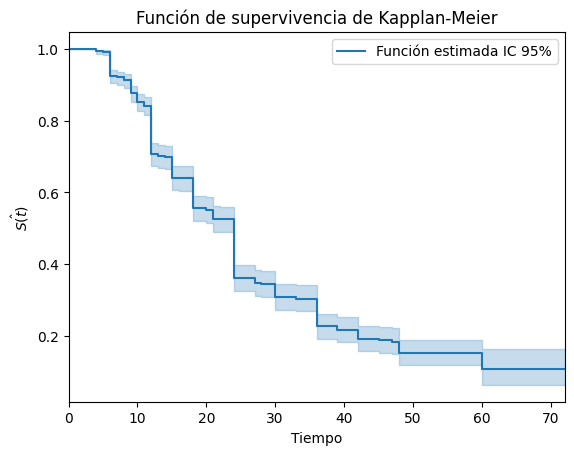

In [382]:
## Gráfica de la función de supervivencia
km1.plot_survival_function(label= 'Función estimada IC 95%')
plt.xlim(0,72)
plt.title('Función de supervivencia de Kapplan-Meier')
plt.xlabel('Tiempo')
plt.ylabel('$\hat{S(t)}$')
plt.yticks([0.2,0.4,0.6,0.8,1])
plt.show()

In [383]:
km1.median_survival_time_

24.0

La mediana es la partición de los datos, es el punto que indica que la mitad de los datos han fallado, en este caso, que se han pagado los prestamos al Banco de la Ilusión

In [384]:
df = data.copy()

In [385]:
data['rango'] = np.where(data['cantidad']< 3000, 0, 1)

In [386]:
columnas = ['cantidad','meses','rango']
df = data[columnas]

In [387]:
## Punto núemro 10
df_1 = df.loc[df['rango'] == 1]
df_0 = df.loc[df['rango'] == 0]

In [404]:
df_1.head()

,cantidad,meses,rango
1,5951,48,1
3,7882,42,1
4,4870,24,1
7,6948,36,1
8,3059,12,1


In [405]:
df_0['rango'] = df_0['rango'].replace(0, 1)
df_0.head()

C:\Users\user\AppData\Local\Temp\ipykernel_15048\1324730039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['rango'] = df_0['rango'].replace(0, 1)


,cantidad,meses,rango
2,2096,12,1
6,2835,24,1
10,1295,12,1
12,1567,12,1
13,1199,24,1


In [390]:
## Modelo Kaplan-Meier 2
km2 = KaplanMeierFitter().fit(df_1['meses'], df_1['rango'])
km3 = KaplanMeierFitter().fit(df_0['meses'], df_0['rango'])

(0.0, 1.1)

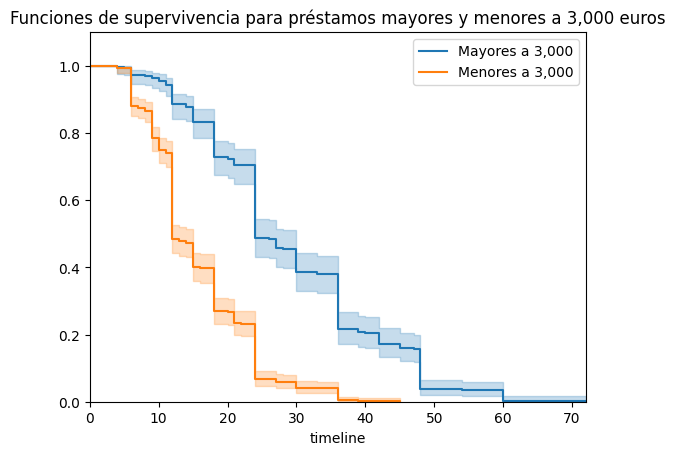

In [391]:
# gráficar prestamos menoresa a 3000 euros y mayores a esa cantidad
km2.plot_survival_function(label = 'Mayores a 3,000')
km3.plot_survival_function(label = 'Menores a 3,000')
plt.title('Funciones de supervivencia para préstamos mayores y menores a 3,000 euros')
plt.xlim(0,72)
plt.ylim(0,1.1)

prueba de hipótesis (Log Rank Test)

$Ho: S(1) = S(2)$ funciones de supervivencia iguales

$Ha: S(1) \neq S(2)$ funciones de supervivnecia distintas

In [392]:
LRT = logrank_test(df_0['meses'], df_1['meses'], df_0['rango'], df_1['rango'])
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         248.34 <0.005    183.45

Como $p-value<alpha$

Rechazamos Ho, las funciones de supervivencia son distintas

In [393]:
columnas_modelo = ['meses', 'cantidad', 'tasa_de_interes', 'historia_crediticia', 'aval', 'credito_pagado']
modelo = datacopia[columnas_modelo]

Las variables de cantidad aumentan el riesgo de pagar el préstamo mientras sean cantidades pequeñas, para el historial crediticio si ha pagado anteriorimente eso aumentará el riesgo de liquidarlo y si no ha pagado, disminuirá el riesgo de liquidarlo, finalmente el tener un aval puede influir en si una persona tenga mayor riesgo de pagar su préstamo.

In [394]:
modelo

,meses,cantidad,tasa_de_interes,historia_crediticia,aval,credito_pagado
1,48,5951,2,pago_algun_credito,No aval,0
2,12,2096,2,no_ha_pagado,No aval,1
3,42,7882,2,pago_algun_credito,aval,1
4,24,4870,3,pago_retrasado,No aval,0
6,24,2835,3,pago_algun_credito,No aval,1
...,...,...,...,...,...,...
995,12,1736,3,pago_algun_credito,No aval,1
996,30,3857,4,pago_algun_credito,No aval,1
997,12,804,4,pago_algun_credito,No aval,1
998,45,1845,4,pago_algun_credito,No aval,0


In [395]:
dummiesM1 = pd.get_dummies(modelo['historia_crediticia'], prefix = 'historial').astype(int)
dummiesM2 = pd.get_dummies(modelo['aval'], prefix = 'aval').astype(int)

In [396]:
dummiesM1 = dummiesM1[['historial_pago_algun_credito', 'historial_pago_retrasado', 'historial_no_ha_pagado', 'historial_pago_todos']]
modelo = pd.concat([modelo, dummiesM1], axis =1)

In [397]:
dummiesM2 = dummiesM2[['aval_No aval']]
modelo = pd.concat([modelo, dummiesM2], axis =1)

In [398]:
modelo = modelo.drop('aval', axis=1)
modelo = modelo.drop('historia_crediticia', axis=1)

In [399]:
modelo

,meses,cantidad,tasa_de_interes,credito_pagado,historial_pago_algun_credito,historial_pago_retrasado,historial_no_ha_pagado,historial_pago_todos,aval_No aval
1,48,5951,2,0,1,0,0,0,1
2,12,2096,2,1,0,0,1,0,1
3,42,7882,2,1,1,0,0,0,0
4,24,4870,3,0,0,1,0,0,1
6,24,2835,3,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
995,12,1736,3,1,1,0,0,0,1
996,30,3857,4,1,1,0,0,0,1
997,12,804,4,1,1,0,0,0,1
998,45,1845,4,0,1,0,0,0,1


In [400]:
## estimar el modelo de Cox
cph1 = CoxPHFitter().fit(modelo, 'meses', 'credito_pagado')
cph1.print_summary()

<lifelines.CoxPHFitter: fitted with 817 total observations, 268 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 817
number of events observed = 549
   partial log-likelihood = -3078.22
         time fit was run = 2023-11-17 00:04:52 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                            
cantidad                      -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
tasa_de_interes               -0.42       0.66       0.04            -0.50            -0.34                 0.61                 0.71
historial_pago_algun_credito   0.69       2.00       0.30             0.11             1.28                 1.12                 3.58
historial_pago_retrasado       0.53       1.71       0.33            -0.10             1.17                 0.90                 3.23
historial_no_ha_pagado         1.13       3.10       0.30             0.55             1.72                 1.73                 5.58
historial_pago_todos          -0.09       0.92       0.38            -0.84             0.67                 0.43                 1.94
aval_No aval                  -0.05       0.95       0.17            -0.39             0.28                 0.68                 1.32

                               cmp to      z      p   -log2(p)
covariate                                                     
cantidad                         0.00 -14.18 <0.005     149.13
tasa_de_interes                  0.00 -10.21 <0.005      78.92
historial_pago_algun_credito     0.00   2.34   0.02       5.71
historial_pago_retrasado         0.00   1.64   0.10       3.31
historial_no_ha_pagado           0.00   3.79 <0.005      12.67
historial_pago_todos             0.00  -0.23   0.82       0.29
aval_No aval                     0.00  -0.32   0.75       0.42
---
Concordance = 0.78
Partial AIC = 6170.43
log-likelihood ratio test = 375.99 on 7 df
-log2(p) of ll-ratio test = 254.05

- Por cada euro que se añada al préstamo se disminuye el riesgo de que se pague el préstamo en un 0.0413% con respecto a una persona que no tiene historial crediticio y tiene un aval
- Por cada porcentaje que aumente la tasa de interés disminuye el riesgo de que se pague el préstamo en un 34.0669% con respecto a una persona que no tiene historial crediticio y tiene un aval
- Si pagó algún credito en su historial aumenta el riesgo de que se pague el préstamo en un 100.33% con respecto a una persona que no tiene historial crediticio y tiene un aval 
- Si en su historial se indica que no ha pagado aumenta el riesgo de pago en un 210% con respecto a una persona que no tiene historial crediticio y tiene un aval

Todas las varibles donde p > 0.05 NO se rechazan, por lo tanto no tienen efecto las siguientes variables: historial_pago_retrasado, historial_pago_todos y aval_No_aval. Todas ellas no tiene efecto en el riesgo de pagar un préstamo.

In [401]:
cph1.params_

covariate
cantidad                       -0.000413
tasa_de_interes                -0.416530
historial_pago_algun_credito    0.694816
historial_pago_retrasado        0.534055
historial_no_ha_pagado          1.132453
historial_pago_todos           -0.087085
aval_No aval                   -0.054886
Name: coef, dtype: float64

In [402]:
cph1.hazard_ratios_

covariate
cantidad                        0.999587
tasa_de_interes                 0.659331
historial_pago_algun_credito    2.003341
historial_pago_retrasado        1.705835
historial_no_ha_pagado          3.103260
historial_pago_todos            0.916599
aval_No aval                    0.946593
Name: exp(coef), dtype: float64

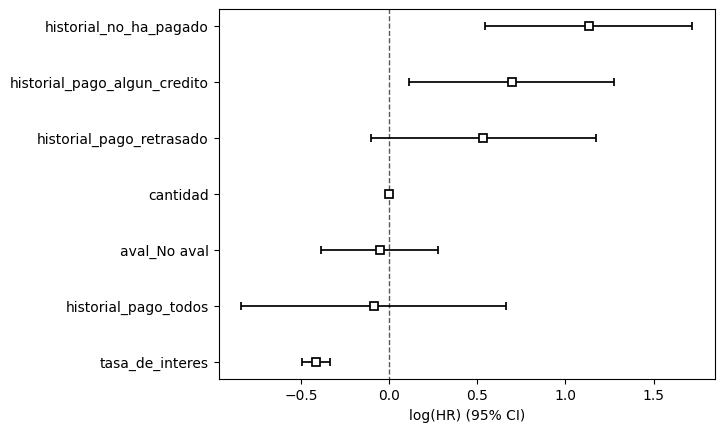

In [403]:
 cph1.plot()
 plt.show()

El análisis de riesgo de pago de préstamos realizado por el Banco de la Ilusión ha arrojado valiosa información que puede transformar la forma en que se otorgan los préstamos. A continuación, presentamos nuestras conclusiones y recomendaciones para mejorar las políticas de préstamos:
1.	Reducción del Monto del Préstamo:
	- Los datos sugieren que por cada euro adicional en el préstamo, el riesgo de pago disminuye en un 0.0413% en comparación con aquellos sin historial crediticio y con aval.
	- Recomendación: Considerar reducir los montos de préstamo para mitigar riesgos.
2.	Revisión de las Tasas de Interés:
	- El análisis muestra que un aumento en la tasa de interés disminuye el riesgo de pago en un 34.0669%.
	- Recomendación: Evaluar cuidadosamente las tasas de interés para equilibrar la rentabilidad con la probabilidad de pago.
3.	Historial Crediticio y Aval:
	- El historial crediticio es un factor crucial. Los clientes que han pagado créditos anteriores tienen un riesgo de pago un 100.33% mayor que aquellos sin historial crediticio y con aval.
	- Sin embargo, las variables “historial_pago_retrasado”, “historial_pago_todos” y “aval_No_aval” no son estadísticamente significativas.
	- Recomendación: Ponderar adecuadamente el historial crediticio al evaluar la elegibilidad para préstamos.
4.	Flexibilidad y Adaptabilidad:
	- El mercado financiero es dinámico. El Banco de la Ilusión debe mantenerse flexible y adaptarse a las circunstancias cambiantes.
	- Realizar evaluaciones periódicas y ajustar las políticas según los resultados reales.
	
En resumen, el Banco de la Ilusión tiene la oportunidad de optimizar sus políticas de préstamos considerando una combinación inteligente de montos, tasas de interés y antecedentes crediticios. La sostenibilidad y la satisfacción del cliente serán los pilares del éxito.

Limitaciones:

1. **Kaplan-Meier**:
   - **Censura**: El método de Kaplan-Meier asume que la censura es independiente de la probabilidad de supervivencia. Sin embargo, en la práctica, esto puede no ser cierto. Por ejemplo, si los pacientes con peor pronóstico son más propensos a abandonar el estudio, la censura puede estar relacionada con la supervivencia.
   - **No considera covariables**: El método de Kaplan-Meier no tiene en cuenta las covariables o variables explicativas. No podemos evaluar cómo diferentes factores afectan la supervivencia de manera simultánea.

2. **Modelo de Cox**:
   - **Supuesto de proporcionalidad de riesgos**: El modelo de Cox asume que los riesgos relativos (HR) son constantes a lo largo del tiempo. Si esta suposición no se cumple (por ejemplo, si los efectos de las covariables cambian con el tiempo), el modelo puede no ser apropiado.
   - **No proporciona estimaciones absolutas**: El modelo de Cox proporciona estimaciones relativas de riesgo (HR), pero no proporciona estimaciones absolutas de la probabilidad de supervivencia en un momento específico.
   - **Dependencia de la proporción de censura**: El modelo de Cox puede verse afectado por la proporción de censura en los datos. Si la proporción de censura es muy alta o muy baja, los resultados pueden ser menos confiables.

En resumen, el método de Kaplan-Meier es útil para describir la supervivencia en grupos sin considerar covariables, mientras que el modelo de Cox permite evaluar el efecto de múltiples factores en la supervivencia. Sin embargo, ambos métodos tienen sus limitaciones y deben utilizarse con precaución según el contexto del estudio.